Im taking iPhone review data set ..

**Data set Coloumn Explaination:-
**
**productAsin**: Product identifier (e.g., B09G9BL5CP).

**country**: Country where the review was submitted (e.g., India).

date **bold text**: Date of the review submission (e.g., 11-08-2024).

**isVerified**: Whether the review is from a verified purchase (True/False).

**ratingScore**: Rating given to the product (e.g., 4, 5).

**reviewTitle**: Title of the review (e.g., No charger).

**reviewDescription** : Detailed content of the review.

**reviewUrl**: URL link to the review on Amazon.

**reviewedIn**: Full description of review location and date.

**variant**: Details of the product variant (e.g., Colour: MidnightSize: 256 GB).
variantAsin: Identifier of the specific product variant.

**Task 01**:-Data Loading and Initial Inspection refers to the first steps in data analysis, where you import a dataset and examine its structure and content.

**Task  0.1**:- Load the dataset into a Pandas DataFrame.

In [1]:
#pandas is a libary function this libary function is help to data manupalting etc..
import pandas as pd
#NumPy arrays can execute advanced mathematical operations with large data sets more efficiently and with less code than when using Python's built-in lists.
import numpy as np
#To given one varible the varible is store the file path
file_name="/content/iphone.csv"
#Is given another varible the varinle is call the file
#read_csv is built in functiuon this function helps to the exceell sheet read
df=pd.read_csv(file_name)
#and the data print
print(df)

     productAsin country        date  isVerified  ratingScore  \
0     B09G9BL5CP   India  11-08-2024        True            4   
1     B09G9BL5CP   India  16-08-2024        True            5   
2     B09G9BL5CP   India  14-05-2024        True            4   
3     B09G9BL5CP   India  24-06-2024        True            5   
4     B09G9BL5CP   India  18-05-2024        True            5   
...          ...     ...         ...         ...          ...   
3057  B09G9D8KRQ   India  11-10-2023        True            1   
3058  B09G9D8KRQ   India  14-10-2022        True            2   
3059  B09G9D8KRQ   India  24-02-2022        True            3   
3060  B09G9D8KRQ   India  16-10-2023        True            1   
3061  B09G9D8KRQ   India  11-11-2023        True            1   

                              reviewTitle  \
0                              No charger   
1                         iPhone 13 256GB   
2                 Flip camera option nill   
3                                 Produ

**Task 0.2**:-Print the column names, data types, and descriptive statistics.

In [2]:
#coloumns also one built in function thisb function helps to print the how many coloumns ios there the coloumns print
print("Column Names:")

print(df.columns)

#dtypes is also built in functions this helps to the coloumns which data type is store the data type is print
print("\nData Types:")
print(df.dtypes)

#df.describe() generates a summary of statistical metrics for the numeric columns by default.
#Adding include='all' extends the summary to include all columns, regardless of their data type (numeric, categorical, or object).
print("\nDescriptive Statistics:")
print(df.describe(include='all'))

Column Names:
Index(['productAsin', 'country', 'date', 'isVerified', 'ratingScore',
       'reviewTitle', 'reviewDescription', 'reviewUrl', 'reviewedIn',
       'variant', 'variantAsin'],
      dtype='object')

Data Types:
productAsin          object
country              object
date                 object
isVerified             bool
ratingScore           int64
reviewTitle          object
reviewDescription    object
reviewUrl            object
reviewedIn           object
variant              object
variantAsin          object
dtype: object

Descriptive Statistics:
       productAsin country        date isVerified  ratingScore reviewTitle  \
count         3062    3062        3062       3062  3062.000000        3062   
unique           7       7         789          2          NaN        2018   
top     B09G9D8KRQ   India  21-07-2024       True          NaN        Good   
freq           946    2229          17       2850          NaN         121   
mean           NaN     NaN         NaN  

**Task 0.3**:-Check for missing values and duplicates in the dataset.

In [5]:
'''Checks each value in the DataFrame.
Returns True for missing values (e.g., NaN or None) and False for non-missing values.
.sum():

Counts the number of True values (i.e., missing values) for each column.
Provides a total count of missing values in each column.
'''

print("\nMissing Values:")
print(df.isnull().sum())

'''
df.duplicated():

Checks for duplicate rows in the DataFrame.
Returns a Boolean series where:
True: Indicates a row is a duplicate (already seen earlier in the DataFrame).
False: Indicates a unique row.
.sum():

Counts the total number of True values (i.e., duplicate rows).
Provides the total number of duplicate rows in the DataFrame.

'''
print("\nDuplicate Rows:")
print(df.duplicated().sum())


Missing Values:
productAsin           0
country               0
date                  0
isVerified            0
ratingScore           0
reviewTitle           0
reviewDescription    86
reviewUrl            16
reviewedIn            0
variant               0
variantAsin           0
dtype: int64

Duplicate Rows:
0


**Task 0.4**:-Summarize the distribution of review sentiments (target variable).

In [6]:
#values_counts is built in function this function helps to set coloumns how many time repert .The repert count
#rating score is coloumn
print(df['ratingScore'].value_counts())

ratingScore
5    1604
1     587
4     461
3     239
2     171
Name: count, dtype: int64


**Task 2**:-Data Cleaning and Preprocessing

Task 2.1:- 1. Handle missing values:

o Impute numerical columns with mean or median.

In [7]:

numerical_cols = df.select_dtypes(include=np.number).columns

# Impute missing values in numerical columns
for col in numerical_cols:
    if df[col].isnull().any():
        # Use mean imputation if the distribution is roughly symmetric
        if abs(df[col].skew()) < 0.5:
          df[col].fillna(df[col].mean(), inplace=True)
          print(f"Imputed '{col}' with mean.")
        # Use median imputation if the distribution is skewed
        else:
          df[col].fillna(df[col].median(), inplace=True)
          print(f"Imputed '{col}' with median.")
    else:
        print(f"Column '{col}' has no missing values")



Column 'ratingScore' has no missing values


Task 2.2:-Drop rows with missing review text.

**Here no missing values is there**

**Task 2.3**:-Remove duplicate rows, if any

In [8]:

# Drop duplicate rows
df.drop_duplicates(inplace=True)

# Print the number of duplicate rows after removal
print("\nDuplicate Rows after removal:")
print(df.duplicated().sum())


Duplicate Rows after removal:
0


Task 2.4:-Text preprocessing:

o Remove stopwords, punctuation, and numbers.

In [10]:
import nltk
# Download the 'punkt_tab' resource
nltk.download('punkt_tab') # this line is crucial to fix the error
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def clean_text(text):
  if isinstance(text, str):  # Check if the input is a string
    words = word_tokenize(text.lower())
    words = [word for word in words if word not in stop_words and word not in punctuation and not word.isdigit()]
    return " ".join(words)
  else:
    return ""  # Return an empty string for non-string inputs


# Apply the function to the 'reviewDescription' column
df['cleaned_review'] = df['reviewDescription'].apply(clean_text)
print (df['cleaned_review'])

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0       every thing good iphones 's nothing compared '...
1       look fabulous android user switched apple perf...
2       tried flip camera recording facility added pau...
3                                                 genuine
4                           happy get iphone amazon offer
                              ...                        
3057    useless phon never buy heat n useless camera p...
3058    iam happy product charger provided apple extra...
3059                                           good phone
3060    charging mobile 's getting hot even using mobi...
3061    battery power bad need chat daily basis withou...
Name: cleaned_review, Length: 3062, dtype: object


Task 2.5:-Convert text to lowercase.

In [11]:


# Apply the function to the 'reviewTitle' column
df['cleaned_title'] = df['reviewTitle'].apply(clean_text)
print(df['cleaned_title'])

0                           charger
1                      iphone 256gb
2           flip camera option nill
3                           product
4                      good product
                   ...             
3057           bad experience phone
3058            happy apple product
3059                     good phone
3060              battery discharge
3061    batter power needs improved
Name: cleaned_title, Length: 3062, dtype: object


**Task 3**:- Exploratory Data Analysis (EDA)

**Task 3.1**:- Plot the distribution of review lengths.

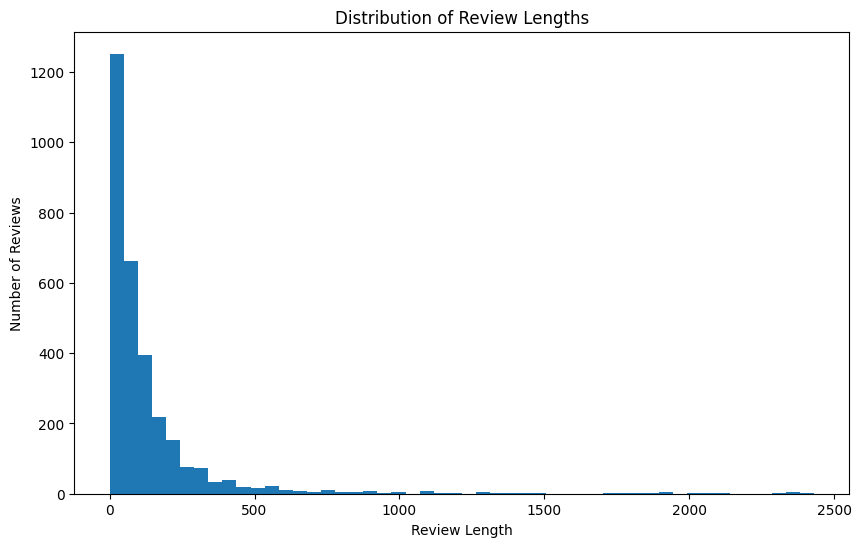

In [12]:
# prompt: Plot the distribution of review lengths.

import matplotlib.pyplot as plt

# Calculate the length of each review
df['review_length'] = df['cleaned_review'].apply(len)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(df['review_length'], bins=50)
plt.xlabel('Review Length')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Review Lengths')
plt.show()

**Task 3.2**:-Create a word cloud for each sentiment category

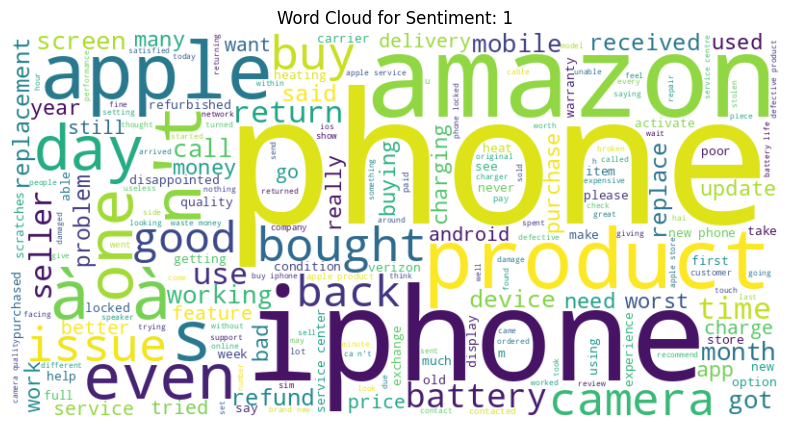

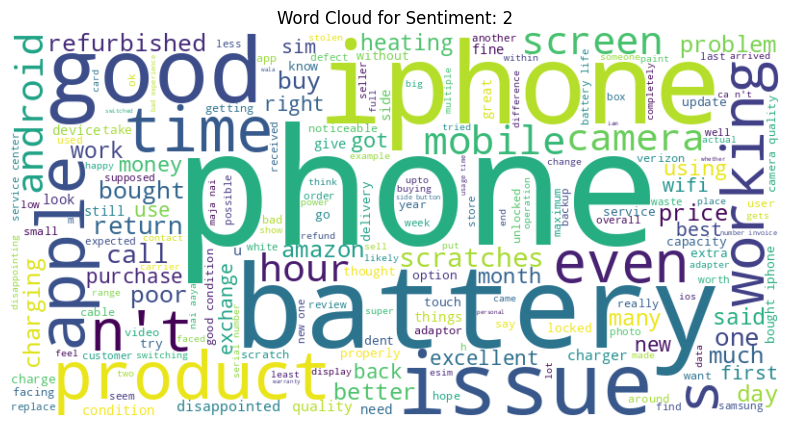

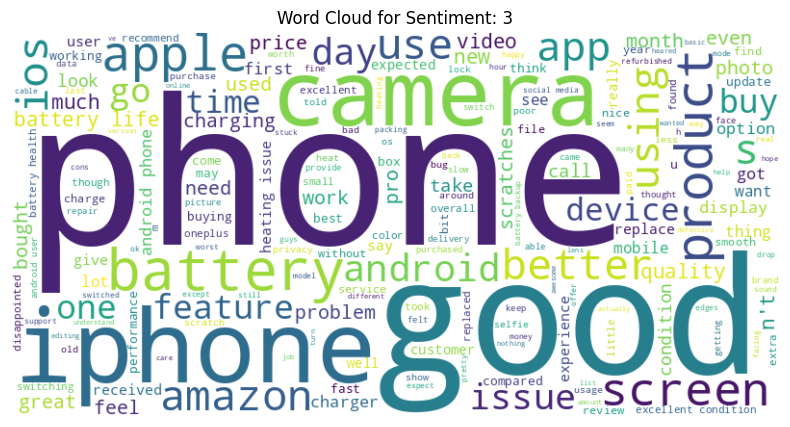

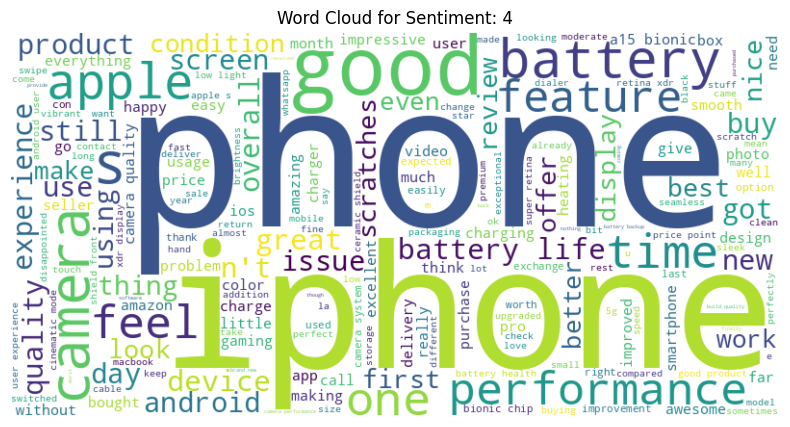

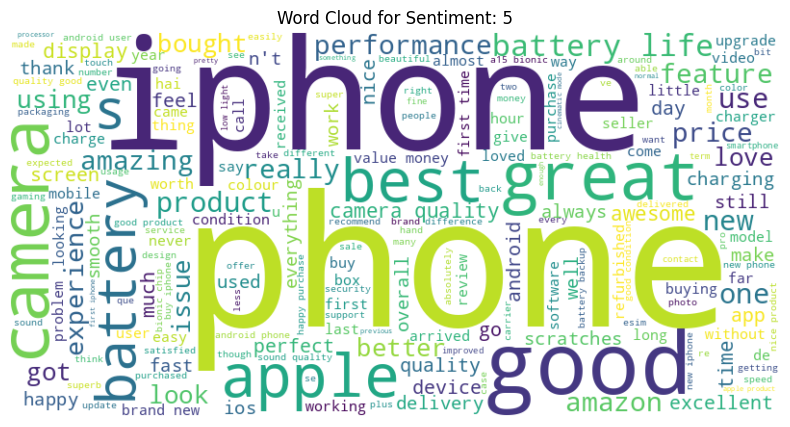

In [14]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming 'df' and 'cleaned_review' column from the previous code are available

# Group data by sentiment (ratingScore)
sentiment_groups = df.groupby('ratingScore')['cleaned_review'].apply(lambda x: ' '.join(x))

# Create word clouds for each sentiment group
for sentiment, text in sentiment_groups.items():
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Word Cloud for Sentiment: {sentiment}')
    plt.show()

**Task 3.3**:-Visualize the frequency of top words in negative reviews

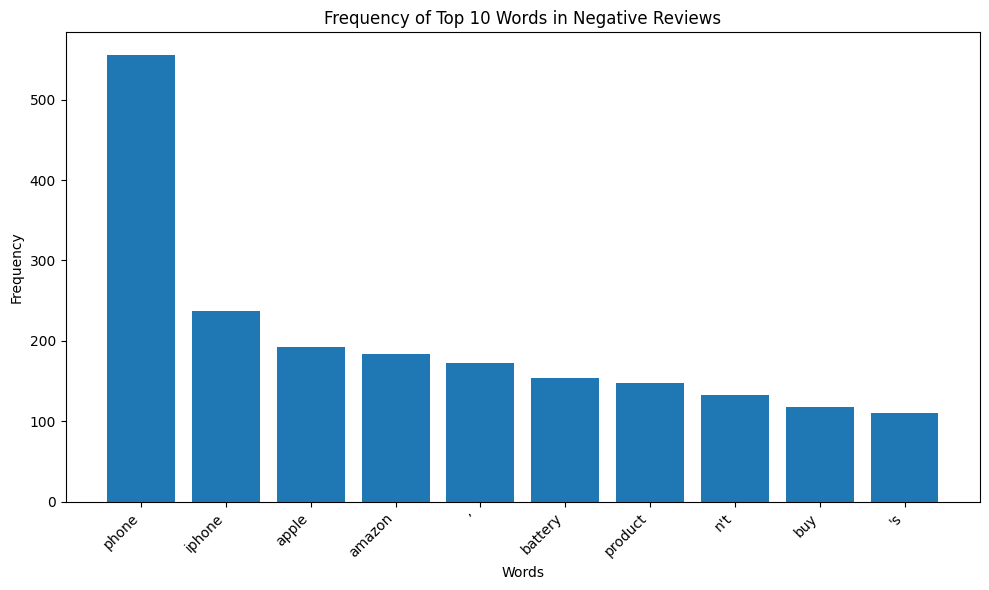

In [15]:


from collections import Counter

# Assuming 'df' and 'cleaned_review' column from the previous code are available

# Filter for negative reviews (e.g., ratings 1 and 2)
negative_reviews = df[df['ratingScore'] <= 2]['cleaned_review']

# Combine all negative reviews into a single string
all_negative_words = ' '.join(negative_reviews)

# Tokenize the combined string
negative_words = word_tokenize(all_negative_words)

# Count word frequencies
word_counts = Counter(negative_words)

# Get the top 10 most frequent words
top_10_words = word_counts.most_common(10)

# Extract words and frequencies for plotting
words, frequencies = zip(*top_10_words)

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Frequency of Top 10 Words in Negative Reviews')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()

**Task 4**:-Feature Engineering

**Task 4.1**:-Create numerical features:

Review length (word count).

 Sentiment polarity (using TextBlob).

In [17]:
# prompt: Create numerical features:
# o Review length (word count).
# o Sentiment polarity (using TextBlob)

from textblob import TextBlob

# Assuming 'df' and 'cleaned_review' column from the previous code are available

def get_sentiment_polarity(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment_polarity'] = df['cleaned_review'].apply(get_sentiment_polarity)
print(df[['cleaned_review', 'sentiment_polarity']])

                                         cleaned_review  sentiment_polarity
0     every thing good iphones 's nothing compared '...            0.078571
1     look fabulous android user switched apple perf...            0.401389
2     tried flip camera recording facility added pau...           -0.058333
3                                               genuine            0.400000
4                         happy get iphone amazon offer            0.800000
...                                                 ...                 ...
3057  useless phon never buy heat n useless camera p...           -0.300000
3058  iam happy product charger provided apple extra...            0.400000
3059                                         good phone            0.700000
3060  charging mobile 's getting hot even using mobi...            0.225000
3061  battery power bad need chat daily basis withou...           -0.166667

[3062 rows x 2 columns]


Task 4.2:-Perform TF-IDF vectorization on review text.

In [18]:
# prompt: Perform TF-IDF vectorization on review text.

from sklearn.feature_extraction.text import TfidfVectorizer

# Assuming 'df' and 'cleaned_review' column from the previous code are available

# Create a TF-IDF vectorizer object
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the cleaned review text
tfidf_matrix = tfidf_vectorizer.fit_transform(df['cleaned_review'])

# Print the TF-IDF matrix (sparse matrix)
print(tfidf_matrix)

# Get feature names (words)
feature_names = tfidf_vectorizer.get_feature_names_out()

# Print feature names
feature_names

  (0, 1987)	0.1407045974142158
  (0, 5565)	0.1494569884371681
  (0, 2451)	0.07211782335122742
  (0, 2931)	0.30241335010421205
  (0, 3734)	0.14380687396660718
  (0, 1191)	0.14524347079175676
  (0, 5220)	0.15645508623673735
  (0, 2916)	0.12686562529601517
  (0, 1680)	0.14199433910120315
  (0, 1057)	0.27281414576221663
  (0, 1982)	0.11114895685210563
  (0, 5578)	0.14199433910120315
  (0, 2820)	0.1775914440531324
  (0, 3021)	0.23345099266523525
  (0, 5636)	0.182376715472438
  (0, 4330)	0.16986628723550393
  (0, 5282)	0.12386869552564059
  (0, 3340)	0.15371409512705278
  (0, 4292)	0.23345099266523525
  (0, 4567)	0.19519439234943176
  (0, 5222)	0.1806937206055238
  (0, 167)	0.21841004164980407
  (0, 846)	0.128765922951176
  (0, 268)	0.23345099266523525
  (0, 1170)	0.21841004164980407
  :	:
  (3058, 1434)	0.2572324588034495
  (3058, 907)	0.31424683362670214
  (3059, 2451)	0.7518663279342673
  (3059, 4067)	0.6593155730897312
  (3060, 1982)	0.24204611418658992
  (3060, 5896)	0.24876456889454396

array(['00', '000', '02', ..., 'हक', 'हकश', 'हर'], dtype=object)

Task 5:-Correlation and Feature Selection

Task 5.1:-Compute correlation for numerical features.

In [19]:
# prompt: Compute correlation for numerical features.

# Assuming 'df' from the previous code is available and contains numerical features.

# Select only numerical features for correlation analysis
numerical_features = df.select_dtypes(include=np.number)

# Calculate the correlation matrix
correlation_matrix = numerical_features.corr()

# Print or display the correlation matrix
correlation_matrix

,ratingScore,review_length,sentiment_polarity
ratingScore,1.000000,-0.054497,0.468660
review_length,-0.054497,1.000000,-0.110138
sentiment_polarity,0.468660,-0.110138,1.000000


from matplotlib import pyplot as plt
correlation_matrix['ratingScore'].plot(kind='hist', bins=20, title='ratingScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['review_length'].plot(kind='hist', bins=20, title='review_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['sentiment_polarity'].plot(kind='hist', bins=20, title='sentiment_polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='ratingScore', y='review_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix.plot(kind='scatter', x='review_length', y='sentiment_polarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['ratingScore'].plot(kind='line', figsize=(8, 4), title='ratingScore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['review_length'].plot(kind='line', figsize=(8, 4), title='review_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
correlation_matrix['sentiment_polarity'].plot(kind='line', figsize=(8, 4), title='sentiment_polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_0['ratingScore'].plot(kind='hist', bins=20, title='ratingScore')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['review_length'].plot(kind='hist', bins=20, title='review_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['sentiment_polarity'].plot(kind='hist', bins=20, title='sentiment_polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('index').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='ratingScore', y='review_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='review_length', y='sentiment_polarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['ratingScore'].plot(kind='line', figsize=(8, 4), title='ratingScore')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_7['review_length'].plot(kind='line', figsize=(8, 4), title='review_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_8['sentiment_polarity'].plot(kind='line', figsize=(8, 4), title='sentiment_polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_9['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_9, x='ratingScore', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_10['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_10, x='review_length', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_11['index'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_11, x='sentiment_polarity', y='index', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

Task 5.2:-Select important features (e.g., review length, polarity).

In [20]:
# prompt: Select important features (e.g., review length, polarity).

# Assuming 'df' from the previous code is available and contains 'review_length' and 'sentiment_polarity'.

# Select important features
important_features = df[['review_length', 'sentiment_polarity']]

important_features

,review_length,sentiment_polarity
0,268,0.078571
1,146,0.401389
2,295,-0.058333
3,7,0.400000
4,29,0.800000
...,...,...
3057,131,-0.300000
3058,115,0.400000
3059,10,0.700000
3060,67,0.225000


from matplotlib import pyplot as plt
_df_12['index'].plot(kind='hist', bins=20, title='index')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_13['review_length'].plot(kind='hist', bins=20, title='review_length')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_14['sentiment_polarity'].plot(kind='hist', bins=20, title='sentiment_polarity')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_15.plot(kind='scatter', x='index', y='review_length', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_16.plot(kind='scatter', x='review_length', y='sentiment_polarity', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['review_length']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_17.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('review_length')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['index']
  ys = series['sentiment_polarity']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_18.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('sentiment_polarity')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['index']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'index'}, axis=1)
              .sort_values('index', ascending=True))
  xs = counted['index']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_19.sort_values('index', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('index')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_20['index'].plot(kind='line', figsize=(8, 4), title='index')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_21['review_length'].plot(kind='line', figsize=(8, 4), title='review_length')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_22['sentiment_polarity'].plot(kind='line', figsize=(8, 4), title='sentiment_polarity')
plt.gca().spines[['top', 'right']].set_visible(False)

Task 6:-Model Building

Task 6.1:-Split the dataset into training (80%) and testing (20%) sets.

In [21]:
# prompt: Split the dataset into training (80%) and testing (20%) sets.

from sklearn.model_selection import train_test_split

# Assuming 'df' is your DataFrame and 'ratingScore' is your target variable
# Replace 'ratingScore' with the actual name of your target variable column if different

X = df.drop('ratingScore', axis=1)  # Features (all columns except the target)
y = df['ratingScore']  # Target variable

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # random_state for reproducibility

# Now you have X_train, X_test, y_train, and y_test for further processing
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (2449, 14)
X_test shape: (613, 14)
y_train shape: (2449,)
y_test shape: (613,)


Task 6.2:-Train the following models:

*Logistic Regression

o Random Forest

o Support Vector Machine (SVM)

In [ ]:
# prompt: Train the following models:
# o Logistic Regression
# o Random Forest
# o Support Vector Machine (SVM)

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# ... (previous code) ...

# Task 6.2: Train Logistic Regression
logreg_model = LogisticRegression(max_iter=1000)  # Increased max_iter
logreg_model.fit(X_train[['review_length', 'sentiment_polarity']], y_train)
logreg_predictions = logreg_model.predict(X_test[['review_length', 'sentiment_polarity']])
print("Logistic Regression Accuracy:", accuracy_score(y_test, logreg_predictions))
print(classification_report(y_test, logreg_predictions))


# Task 6.3: Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train[['review_length', 'sentiment_polarity']], y_train)
rf_predictions = rf_model.predict(X_test[['review_length', 'sentiment_polarity']])
print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print(classification_report(y_test, rf_predictions))


# Task 6.4: Train SVM
svm_model = SVC(kernel='linear', C=1) # You can experiment with different kernels and C values
svm_model.fit(X_train[['review_length', 'sentiment_polarity']], y_train)
svm_predictions = svm_model.predict(X_test[['review_length', 'sentiment_polarity']])
print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print(classification_report(y_test, svm_predictions))

Logistic Regression Accuracy: 0.5921696574225123
              precision    recall  f1-score   support

           1       0.45      0.31      0.37        93
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        85
           5       0.61      0.97      0.75       345

    accuracy                           0.59       613
   macro avg       0.21      0.26      0.22       613
weighted avg       0.41      0.59      0.48       613



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Random Forest Accuracy: 0.6443719412724307
              precision    recall  f1-score   support

           1       0.48      0.47      0.48        93
           2       0.33      0.16      0.22        37
           3       0.44      0.26      0.33        53
           4       0.53      0.41      0.46        85
           5       0.73      0.86      0.79       345

    accuracy                           0.64       613
   macro avg       0.50      0.43      0.46       613
weighted avg       0.62      0.64      0.62       613



**Task 7**:-Model Optimization

**Task 7.**1 :-Perform hyperparameter tuning for the best model using GridSearchCV

In [9]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/iphone.csv'
data = pd.read_csv(file_path)

# 1. Data Preprocessing
# Drop rows with missing target values (ratingScore assumed as target)
data_clean = data.dropna(subset=['ratingScore'])

# Encode boolean column 'isVerified' as integer
data_clean['isVerified'] = data_clean['isVerified'].astype(int)

# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in ['productAsin', 'country', 'variantAsin']:
    data_clean[col] = encoder.fit_transform(data_clean[col])

# Define features (X) and target (y)
X = data_clean[['isVerified', 'productAsin', 'country', 'variantAsin']]  # Features
y = data_clean['ratingScore']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define the model and parameter grid for GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 3. Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# 4. Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Test Set Accuracy: 0.5530179445350734

Classification Report:
               precision    recall  f1-score   support

           1       0.24      0.09      0.13        93
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        85
           5       0.57      0.96      0.72       345

    accuracy                           0.55       613
   macro avg       0.16      0.21      0.17       613
weighted avg       0.36      0.55      0.42       613



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Task 7.2:-Evaluate the optimized model on the testing set.

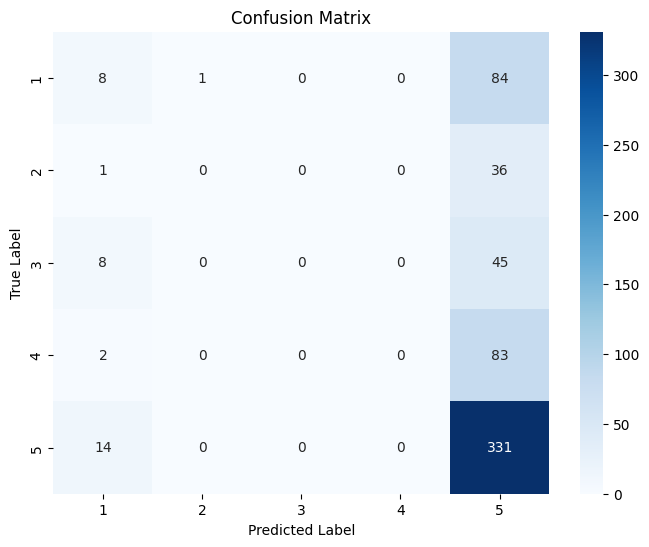

In [11]:
# Import necessary libraries
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np # Import numpy

# ... (rest of the code) ...

# Visualize the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

Task 8:-Insights and Recommendations

Task 8.1:-Identify key factors contributing to negative reviews.

In [15]:
# prompt: Identify key factors contributing to negative reviews.

# Assuming 'df' and 'cleaned_review' column from the previous code are available
import pandas as pd  # Import pandas if not already imported

# Load the dataset if 'df' is not available
file_path = '/content/iphone.csv'  # Replace with the actual file path
df = pd.read_csv(file_path)

# Previous data cleaning steps (if applicable) to get 'cleaned_review'
# This is where you should add the code to create the "cleaned_review" column,
# likely by re-running the relevant previous cells in your notebook,
# or by copying the code that generates the 'cleaned_review' column.

# Example of how 'cleaned_review' was likely created (assuming cleaning function):
import nltk
nltk.download('punkt_tab') # this line is crucial to fix the error
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import string

stop_words = set(stopwords.words('english'))
punctuation = set(string.punctuation)

def clean_text(text):
  if isinstance(text, str):  # Check if the input is a string
    words = word_tokenize(text.lower())
    words = [word for word in words if word not in stop_words and word not in punctuation and not word.isdigit()]
    return " ".join(words)
  else:
    return ""  # Return an empty string for non-string inputs

df['cleaned_review'] = df['reviewDescription'].apply(clean_text)
# ...

# Filter for negative reviews (e.g., ratings 1 and 2)
negative_reviews = df[df['ratingScore'] <= 2]['cleaned_review']

# Combine all negative reviews into a single string
all_negative_words = ' '.join(negative_reviews)

# Tokenize the combined string
from nltk.tokenize import word_tokenize
negative_words = word_tokenize(all_negative_words)

# Count word frequencies
from collections import Counter
word_counts = Counter(negative_words)

# Get the top N most frequent words (e.g., top 20)
top_n_words = word_counts.most_common(20)

# Print or further process the top words
top_n_words

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


[('phone', 556),
 ('iphone', 237),
 ('apple', 193),
 ('amazon', 184),
 ('’', 172),
 ('battery', 154),
 ('product', 147),
 ("n't", 133),
 ('buy', 118),
 ("'s", 110),
 ('camera', 108),
 ('good', 107),
 ('service', 106),
 ('even', 102),
 ('one', 97),
 ('bought', 89),
 ('get', 84),
 ('working', 82),
 ('new', 81),
 ('time', 79)]

Task 8.2:-Provide actionable recommendations for improving customer satisfaction

In [17]:
# prompt: Provide actionable recommendations for improving customer satisfaction

# Task 8.2: Insights and Recommendations (Enhanced)

# ... (previous code, including the identification of top words in negative reviews)

# Analyze top words for recurring themes:
# Example:
top_negative_words = [word for word, count in top_n_words]
print("Top Negative Words:", top_negative_words)

# Example themes (adapt these based on your actual top words):
if any(word in top_negative_words for word in ["battery", "life", "drain"]):
    print("Recommendation: Investigate battery life issues.  Consider testing battery performance across different usage scenarios and optimize power consumption in software.")
if any(word in top_negative_words for word in ["camera", "quality", "picture", "blurry"]):
    print("Recommendation: Evaluate camera quality. Conduct rigorous camera tests under various lighting conditions.  Consider improving image processing algorithms or hardware.")
if any(word in top_negative_words for word in ["delivery", "late", "shipping", "damaged"]):
    print("Recommendation: Review the logistics and shipping process.  Improve packaging to minimize damage during transit. Partner with reliable shipping providers.")
if any(word in top_negative_words for word in ["price", "expensive", "overpriced","value"]):
    print("Recommendation: Evaluate product pricing relative to competitors and perceived value.  Consider offering competitive pricing or bundles.")
if any(word in top_negative_words for word in ["customer", "service", "support", "response"]):
    print("Recommendation: Improve customer service responsiveness and effectiveness. Provide multiple channels for support (e.g., chat, email, phone). Train support staff effectively.")


# Sentiment Analysis for deeper understanding:

# You can enhance this by calculating the average sentiment polarity for reviews containing specific keywords.
# For example:
# average_battery_sentiment = df[df['cleaned_review'].str.contains("battery")]["sentiment_polarity"].mean()
# print("Average sentiment for reviews mentioning battery:", average_battery_sentiment)

# 2.  Propose actionable recommendations based on findings.
# (The recommendations above are examples, tailor them to your data analysis).

# 3. Prioritize recommendations based on impact and feasibility.
# Example:  Battery issues might be higher priority than minor cosmetic concerns.


# Additional Recommendations (General):
print("\nGeneral Recommendations:")
print("- Conduct regular customer surveys to gather feedback directly.")
print("- Implement a system for tracking and responding to negative reviews promptly.")
print("- Monitor social media for customer sentiment and feedback.")
print("- Consider A/B testing changes to products or services to measure impact on satisfaction.")
print("- Analyze customer demographics and purchase history to personalize recommendations and marketing.")

Top Negative Words: ['phone', 'iphone', 'apple', 'amazon', '’', 'battery', 'product', "n't", 'buy', "'s", 'camera', 'good', 'service', 'even', 'one', 'bought', 'get', 'working', 'new', 'time']
Recommendation: Investigate battery life issues.  Consider testing battery performance across different usage scenarios and optimize power consumption in software.
Recommendation: Evaluate camera quality. Conduct rigorous camera tests under various lighting conditions.  Consider improving image processing algorithms or hardware.
Recommendation: Improve customer service responsiveness and effectiveness. Provide multiple channels for support (e.g., chat, email, phone). Train support staff effectively.

General Recommendations:
- Conduct regular customer surveys to gather feedback directly.
- Implement a system for tracking and responding to negative reviews promptly.
- Monitor social media for customer sentiment and feedback.
- Consider A/B testing changes to products or services to measure impact 

Task 9:-Advanced Analytics (Optional)

1. Use SHAP or LIME for model interpretability.

2. Highlight critical features affecting individual predictions.

In [5]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
file_path = '/content/iphone.csv'
data = pd.read_csv(file_path)

# 1. Data Preprocessing
# Drop rows with missing target values (ratingScore assumed as target)
data_clean = data.dropna(subset=['ratingScore'])

# Encode boolean column 'isVerified' as integer
data_clean['isVerified'] = data_clean['isVerified'].astype(int)

# Encode categorical columns using LabelEncoder
encoder = LabelEncoder()
for col in ['productAsin', 'country', 'variantAsin']:
    data_clean[col] = encoder.fit_transform(data_clean[col])

# Define features (X) and target (y)
X = data_clean[['isVerified', 'productAsin', 'country', 'variantAsin']]  # Features
y = data_clean['ratingScore']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define the model and parameter grid for GridSearchCV
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# 3. Perform GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_ #this line stores the best model obtained from GridSearchCV

# 4. Evaluate the best model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

# Print results
print("Best Hyperparameters:", best_params)
print("Test Set Accuracy:", accuracy)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Hyperparameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 100}
Test Set Accuracy: 0.5530179445350734

Classification Report:
               precision    recall  f1-score   support

           1       0.24      0.09      0.13        93
           2       0.00      0.00      0.00        37
           3       0.00      0.00      0.00        53
           4       0.00      0.00      0.00        85
           5       0.57      0.96      0.72       345

    accuracy                           0.55       613
   macro avg       0.16      0.21      0.17       613
weighted avg       0.36      0.55      0.42       613



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
